In [1]:

LABEL_DICTIONARY = {
    "S1": "Very positive",
    "S2": "Positive",
    "S3": "Neutral",
    "S4": "Negative",
    "S5": "Very negative",
    "E1": "Satisfaction",
    "E2": "Insatisfaction",
    "E3": "Anger",
    "E4": "Agressivity",
    "E5": "Sadness/Demotivation",
    "E6": "Fear",
    "E7": "Distress/Serious situation",
    "E8": "Reclamation",
    "E10": "Urgency",
    "E11": "Happiness",
    "C1": "Physical Framework",
    "C2": "Unreachability",
    "C3": "Direct interaction",
    "C4": "Service/Problem resolution",
    "C5": "Complexity/Simplicity",
    "C6": "Errors",
    "C10": "Address/Schedule",
    "C11": "Self-service",
    "C12": "Delay of treatment",
    "C7": "Other causes",
    "C8": "I don't understand",
    "C9": "No cause",
}

NameError: name 'raw_train_ds' is not defined

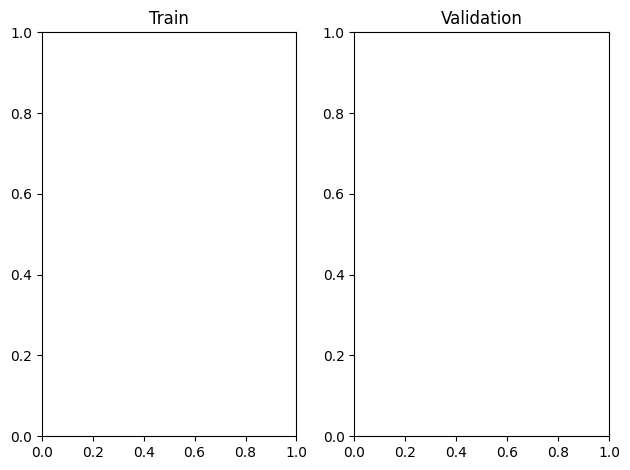

In [2]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, tight_layout=True)
distributions = []

axs[0].set_title("Train"); axs[1].set_title("Validation")
train_distributions = axs[0].hist([label2id[l] for l in raw_train_ds["global_score"]], bins=5)
val_distributions = axs[1].hist([label2id[l] for l in raw_val_ds["global_score"]], bins=5)

for distributions, ax in zip([train_distributions, val_distributions], axs):
    for j in range(5):
        # Display the counts on each column of the histograms
        ax.text(distributions[1][j], distributions[0][j], id2label[j] + " (" + str(int(distributions[0][j])) + ")", weight="bold")


In [3]:
import pandas as pd
import numpy as np
import json
import torch

from datasets import Dataset, load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainerCallback, TrainingArguments
from torch.utils.data import DataLoader

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report

BASE_MODEL = "camembert-base"
LEARNING_RATE = 1e-4
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 50

# Let's name the classes 0, 1, 2, 3, 4 like their indices
id2label = {k:l for k, l in enumerate(ALL_LABELS)}
label2id = {l:k for k, l in enumerate(ALL_LABELS)}

NameError: name 'ALL_LABELS' is not defined

In [7]:
raw_train_ds = Dataset.from_json("input.train.jsonlines")
raw_val_ds = Dataset.from_json("input.validation.jsonlines")
ds = {"train": raw_train_ds, "validation": raw_val_ds}

Using custom data configuration default-f8d5d4ba428de911
Found cached dataset json (/Users/animeshsengupta/.cache/huggingface/datasets/json/default-f8d5d4ba428de911/0.0.0)
Using custom data configuration default-73a76d806e75aabd


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset